# Experiment Design Lecture 2: Response Surface Methodology

## Overview

A brief overview of response surface methodology (RSM) was given in [Lecture 1](ED_1_Introduction.ipynb), so let's review that again.

RSM is a set of methods for fitting a polynomial to a multi-input, multi-output function,

$$
Y = f(X)
$$

using a surrogate function to approximate:

$$
\hat{Y} = g(X)
$$

### Why Polynomials?

We learn in introdutory calculus that Maclaurin and Taylor series expansions are capable of representing any suitably well-behaved function in a suitably small neighborhood by expressing it in terms of an infinite sum of powers of x with coefficients.

Often, complicated functions are simplified (e.g., for integration or evaluation) by writing a Taylor series expansion, which is just a polynomial, and truncating all but the first few terms.

### Why Not Polynomials?

Some care is required to select a system response vector $Y$ that lends itself well to being modeled with a polynomial. Rapidly-changing or overly-sensitive quantities can make $f(X)$ simply too complicated to model using a polynomial.

Another risk is in extrapolating outside of the experimental region: the fitted polynomial only describes responses in a smooth manner over the region where data were obtained.

Outside of this region, the polynomial values can quickly become spurious or non-physical. 

Let's return to the Taylor series for $\sin{x}$ from the first lecture. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from scipy.special import factorial

In [28]:
def f(x):
    """Real function"""
    return np.sin(x)

def g(x):
    """Surrogate function from Taylor series about x=0,
    sin(x) ~ x - 1/3! x^3 + 1/5! x^5
    """
    x0 = 0
    dx = x - x0
    dim = np.shape(dx)[0]
    result = np.zeros(dim,)
    for i in range(dim):
        dxi = dx[i]
        val = dxi
        val -= (1/factorial(3))*pow(dxi,3)
        val += (1/factorial(5))*pow(dxi,5)
        result[i] = val
    
    return result

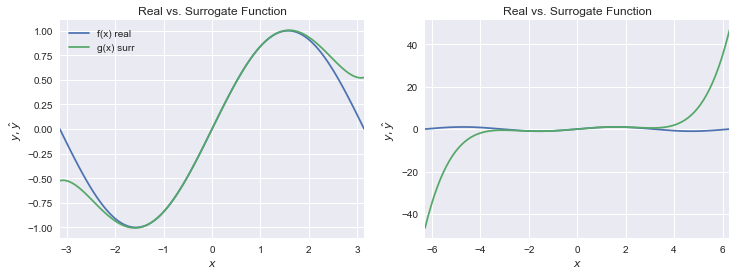

In [29]:
the_x = np.linspace(-np.pi,np.pi,100)
big_x = np.linspace(-2*np.pi,2*np.pi,200)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

for x, ax in zip([the_x,big_x], [ax1,ax2]):
    ax.plot(x, f(x), label='f(x) real')
    ax.plot(x, g(x), label='g(x) surr')
    
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y, \hat{y}$')
    ax.set_xlim([min(x), max(x)])
    ax.set_title('Real vs. Surrogate Function')

ax1.legend()
plt.show()

This surrogate function is only applicable in the neighbohood of $x=0$, so the further we get, the worse the approximation gets.

### Other Types of Linear Models

Are there other ways of using linear models besides RSM? Indeed there are. This is testament to the fact that linear models are surprisingly powerful, given their simplicity.

Here is a partial list of techniques that build linear models of sytem resopnses:

**Generalized Linear Models (GLM)** - These linear models can account for an arbitrary number of inputs and outputs. GLM models postulate that the error in the model representation $y - \hat{y}$ is Gaussian normal. Statistical techniques are then used to construct a linear model and associated error estimates.

**Multiple Linear Regression** - Linear regression technique used to construct models for a *single* response variable $y$ and multiple predictor variables $X$. 

**Multivariate Linear Regression** - Extending multiple linear regression to the case of a multivariate response vector $Y$ is called multivariate linear regression.

**Polynomial Models (Univariate)** - In the simple case of a univariate input and univariate output, the system function $y = f(x)$ can be fit using a simple polynomial fitting procedure.

**Response Surface Models (Multivariate)** - We will cover this in more detail below.

# Strategy for Comprehensive Regression Analysis

Selecting a strategy for comprehensive regression analysis requires some care and consideration of the specifics of your system.

A proposal following the validation strategy in the NISS paper

Steps 1-3 provide information going into the surrogate model construction process

* Determine important variables (prior steps)
* Specify a model form
* Design experiments to determine function samples
* Define selection criteria and comparison metrics
* Calculate comparison metrics, plot data
* Assess if the model is good enough, assess model assumptions, select if satisfied (otherwise proceed to next step)
* Specify a new model form (that can incorporate already-gathered information!) and repeat until criteria met

# Selecting a Model

In order to select the model that is best for the indented use, two things must be done:

First, figure out what is wanted out of the model (the selection criteria).

Second, figure out how to select the model that is the best for that criteria (the comparison metrics).

Part of the difficulty in defining goals and selection criteria is that multivariate surfaces are very difficult to visualize in higher than 2 dimensions. Various selection criteria, i.e. numerical quantities related to error, curvature, best fit, etc., should be used to determine which surface is the best for the intended use. 

## Pre-Selection Step: Experimental Design

Before selecting the form of the surrogate model, you must first select your experimental design. Typically the experimental design is selected to regress some particular functional form (e.g. a polynomial).

A form of the model output(s) as a function of the model input(s) is assumed in order to sample the function as few number of times as possible.

If a Monte Carlo simulation is being run, the cost is very high, but the method is very flexible - any linear model from above may be selected and fit to the data (in this case, it is useful to explore different models of different forms and degrees).

For more information on the experimental design step, see the Experimental Design Lecture. 

### Polynomial Coefficient Standardization

Standardizing the polynomial coefficients:

Transform the variables $x_i$ to the standardized variables $z_i$:

$$
z_i^k = \left( \dfrac{x_i - \overline{x}}{\sigma^2} \right)
$$

This is desirable, not only to ease interpretation, but to keep things numerically stable as well.

## Selection Criteria

The most obvious criteria is minimization of the model's representation error,

$$
\min_{X} Y(X) - \hat{Y}(X)
$$

where $X$ is the input parameter vector, $Y$ is the system response vector, and $\hat{Y}$ is the surrogate model representation of the real response vector.

What experimental design is trying to accomplish for simulations and experiments is similar:

* Experiments are trying to create a simple and cheap model that can adequately represent the relevant features of a relevant physical system
* Simulations are trying to create a simple and cheap model that can adequately represent the result of a much more expensive and complicated model

However, the end use is often different:

* Simulations are trying to determine values of input parameters that lead to the best match between models and experiments
* Experiments are trying to create models that can be used to optimize or control a process, or find minimum/maximum points

### Least Squares for Linear Regression

Using least squares for a linear regression model approximates the coefficients of the linear model by minimizing the sum of the squared error residuals (SSE),

$$
\mbox{SS}_{E} = \sum r_i^2 = \sum \left( y_i - \hat{y} \right)^2
$$

The estimated coefficients that meet this criteria are then called least squares coefficient estimates.

To do this, the SSE equation above is differentiated with respect to each of the parameters $b_0, b_1, b_2, \dots$

All these derivatives are set equal to 0, and these equations are solved simultaneously. In practice, this is done using matrix algebra, which is typically wrapped with a high-level API in a computational implementation.

### Interpretation

Cannot necessarily interpret approximated coefficients as "amount of change in $\hat{y}$ for a unit change in $x_j$"... This assumes that the coefficients are completely independent

In order to determine how good this assumption is, regress the input/predictor variable $x_j$ on all other variables (i.e. find $x_j$ as a function of all other input/predictor variables + constant)

The residuals from this fit are $r^{\star} = x_{ij} - \hat{x}_{ij}$

The coefficient estimate $b_j$ measures the change in the response due to a unit change in $r^{\star}$, not in $x_{ij}$.

If $x_j$ can't be predicted by other variables, then $r^{\star} \approx x_{ij} - \overline{x}_{ij}$ (where overline = average value)

In this case, $b_j$ can be interpreted in the way specified: i.e. measure of change in $\hat{y}$ for unit change in $x_j$.

### Significance

Coefficients cannot be used by themselves to determine relative significance of various terms in the linear model

To actually do this, you need to use normalized/weighted coefficients $\hat{\beta}_j$

Defined as:

$$
\hat{\beta}_j = b_j \left( \frac{s_{jj}}{s_{yy}} \right)^2
$$

where

$$
s_{jj} = (n-1)^{-1} \sum (x_{ij} - \overline{x}_j)^2 \\
s_{yy} = (n-1)^{-1} \sum (y_i - \overline{y}_i)^2
$$

The overline indicates a sample mean.

## Comparison Metrics

### Analysis of Variance (ANOVA Table)

ANOVA is a statistical technique that builds a table attributing the variance in the system response to various degrees of freedom. Each piece of data about the real system contributes one degree of freedom, which can go toward estimating a new coefficient, or can go toward estimating the variance in the model.

Bibliography note: Mason ch. 6, 8 - derived in 6.1

For ANOVA of linear regression models, need to define a few quantities.

Total sum of squares: 

$$
TSS = \sum \left( y_i - \overline{y} \right)^2
$$

Error sum of squares:

$$
SSE = \sum \left( y_i - \hat{y}_i \right)^2
$$

Model sum of squares (regression sum of squares):

$$
SSR = \sum \left( \hat{y}_i - \overline{y} \right)^2
$$

### Univariate Linear Model

(Sample ANOVA table constructed for a linear univariate function)

### Multiple Linear Model

Important not just to assess overall fit of prediction equation

Also important to assess contribution of individual predictor variables to the fit

Many commonly-reported measures of model fitness are part of ANOVA table

Multivariate models: p degrees of freedom for sum of squares due to regression (because p coefficients {\beta_1, \beta_2, \dots \beta_p} must be estimated to obtain regression sum of squares

(Sample ANOVA table constructed for multiple linear function)



$p$ is number of predictor variables. To measure the adequacy of fitted model, determine the error standard deviation:

$$
s_e = (MSE)^{1/2}
$$

where $MSE = SSE/(n-p-1)$.

Small $s_e$ means predicted responses closely approximate observed responses.

Large $s_e$ means large random error, or poor selection of model form.

### F-Statistic

Main article: F-Statistic

I found this short YouTube video very helpful for illustrating what the F-statistic means physically: [link](http://www.youtube.com/watch?v=TMwSS8DAVYk)

The F-statistic can be thought of as a frequentist metric for hypothesis-testing. Once an F-statistic and corresponding p-value is calculated from the ANOVA table quantities, you can determine how confident you can be in a given hypothesis test (where the hypothesis is the model onto which you've chosen to regress your data).

Mason: Different from tests for significance of factor effects in analysis of designed experiments

Mason: example of acid-content data...

For multiple linear regression/model, can use F-statistic to simultaneously test a hypothesis: whether all $\beta_j = 0$ (the hypothesis), or whether at least one $\beta_j \neq 0$ (the null hypothesis, i.e., the outcome that our hypothesis is not correct).

$\beta_1 = \beta_2 = \dots = \beta_p = 0$ versus $\beta_j \neq 0$

(While this seems silly, it's much more useful if you're doing this for a subset of coefficients - such as testing the hypothesis of whether any of a subset of coefficients should be non-zero.)

### Lack of Fit F-Statistic

For (deterministic) computer simulations (rather than experiments, which have random error), error is entirely due to lack of fit - there is no source of random error from real instruments or real experimental noise.

In this case, an F-statistic specifically for lack-of-fit is not possible to calculate (defined as $MSE_{LOF}/MSE_{P}$, and $MSE_P = 0 $for deterministic functions)

### Partial F-Test (Determination of Term Significance)

Consider a full regresion model with $p$ predictor variables.

Now consider a reduced regression model with $k < p$ predictor variables.

Full model = $M_1$

Reduced model = $M_2$

Reduction in error sum of squares resulting from fit of additional terms in full model:

$$
R(M_1 \vert M_2) = SSE_2 - SSE_1
$$

$(p - k)$ more predictor variables

F-statistic for determining statistical significance of this subset is:

$$
F = \frac{ MSR(M_1 \vert M_2) }{ MSE_1 }
$$

where $MSR(M_1 \vert M_2) = \frac{ R(M_1 \vert M_2) }{ (p-k) }$

If $k = p-1$ then the F-statistic is the square of the t-statistic from the full model corresponding to the term left out of the reduced model

To determine if F-statistic is highly significant, use p value (95% likelihood of being significant if $p < 0.05$, 99% likelihood if $p < 0.01$)

Example: use to determine if interaction effect is important to surrogate model.

Using this procedure and using the t-statistic to test the significance of a given term are equivalent!

### T-Statistic

**TODO:** 

Fix from here

**Linear Univariate Model:**

A t-statistic can be constructed to test $\beta_1 = c$ vs. $\beta_1 \neq c$

The following statistic has a Student t-distribution with $n-2$ degrees of freedom:

$$
\begin{array}{rcl} t &=& \frac{ b_1 - \beta_1 }{ s_e / s_xx^{1/2} } \\ s_{xx} &=& \sum \left( x_i - \overline{x} \right)^2 \end{array}
$$

and insert $\beta_1 = c$.

If you insert $c = 0$ and square the result you get the F-statistic from the ANOVA table.

This t-variate can be used to form confidence intervals on the slope parameter.

Following Chapter 2.4: limits for $\beta_1$ are

$$
b_1 - t_{\alpha / 2} \frac{s_e}{s_{xx}^{1/2}} \leq \beta_1 \leq b_1 + t_{\alpha / 2} \frac{s_e}{s_{xx}^{1/2}}
$$

where $t_{\alpha / 2}$ is a $100(\alpha / 2)%$ upper-tail t critical value with n-2 degrees of freedom

Small model standard deviations will lead to small confidence intervals

For the intercept parameter \beta_0, use the following t-variate:

$$
t = \frac{ b_0 - \beta_0 }{ s_e \left( n^{-1} + \overline{x}^2 / s_{xx} \right)^2 }
$$

**Multiple Linear Model:**

Testing hypotheses on individual regression coefficients is of primary interest to someone performing regression analysis

The t-statistic can be constructed to test $\beta_j = c$ versus $\beta_j \neq c$.

Test statistic used for this purpose is:

$$
t = \frac{ b_j - c }{ s_e c_{jj}^{1/2} }
$$

where $s_e = (MSE)^{1/2}$ is the estimated error standard deviation.

$$
c_{jj} = \left[ (n - 1) s_j^2 (1 - R_j^2) \right]^{-1}
$$

$s_j^2$ is the sample variance of the n values of the jth predictor variable

$R_j^2$ is the coefficient of determination for regression of $x_j$ on the constant term and the other $p-1$ predictor variables.

Using t-statistics with $c = 0$ can be used to test statistical significance of of individual model parameters (usefulness of $x_j$ as predictor of response variable)

NOTE: this test is only conditional, since $\beta_j$ is partial regression coefficient, and $b_j$, $c_{jj}$ are functions of other predictor variable values

Only determines significance of jth predictor variable conditional on the presence of the other predictor variables

e.g. "Each individual predictor variable contributes significantly to the given fits, given that the other two predictor variables are also included in the model" 

### Response Confidence Intervals

Want confidence intervals for the response model $\hat{y}$.

**Linear Univariate Models:**

Confidence interval constructed for the response model:

$$
\mu = \beta_0 + \beta_1 x
$$

Mason: for fixed values of x...???

The predicted response $\hat{y}$ has a normal distribution (given certain assumptions).

Thus mean and deviation given by:

$$
\mu = \beta_0 + \beta_1 x
$$

$$
\sigma \left[ a_1 + \left( x - a_2 \right)^2 / s_{xx} \right]^{1/2}
$$

where:

$$
a_1 = \frac{1}{n}
$$

$$
a_2 = \overline{x}
$$

$$
s_{xx} = \sum \left( x_i - \overline{x} \right)^2
$$

And the following t-variate can be used to construct confidence intervals for $\mu$:

$$
t = \frac{ \hat{y} - \mu }{ s_e \left( a_1 + \left( x - a_2 \right) / s_{xx} \right)^2 }
$$

To form prediction interval for actual future response, not expected value of a response.

Use this equation again, but replace $\mu$ with $y_f$, and $a_1$ with $a_1 + 1$.

$y_f$  is the future response

$\hat{y}$ is the predicted value of future response

$a \rightarrow a+1$ is because future response has standard deviation $\sigma$ with an added variability

Standard deviation of $\hat{y} - y_f$ is:

$$
\sigma = \left( 1 + a_1 + \left( x - a_2 \right)^2 / s_{xx} \right)^{1/2}
$$

**Multiple Linear Model:**

Confidence interval for regression coefficients of multiple linear model:

A $100(1-\alpha)%$ confidence interval for $\beta_j$ is given by:

$$
b_j - t_{\alpha/2} s_e c_{jj}^{1/2} \leq \beta_j \leq b_j + t_{\alpha/2} s_e c_{jj}^{1/2}
$$

where $t_{\alpha/2}$ is two-tailed $100 \alpha %$ t critical value having $n - p - 1$ degrees of freedom.

Simultaneous confidence intervals for all coefficients in multiple linear regression model cannot be computed using individual coefficient intervals.

They ignore systematic variation of predictor variables and consequent correlation among coefficient estimators.

### Correlation Coefficient (R Squared)

Measure of correlation between observed and predicted responses

Univariate Linear Model

$$
R^2 = \left[ corr(y,\hat{y}) \right]^2 = 1 - \frac{SSE}{TSS}
$$

**Multiple Linear Model:**

R-squared can be calculated as:

$$
R^2 = 1 - \frac{SSE}{TSS}
$$

It should be acknowledged that as the number of predictor variables approaches the number of observations, this can become arbitrarily close to 1

if $n = p+1$ then $R^2 = 1$.

Adjusted $R^2$, denoted $R_a^2$:

$$
R_a^2 = 1 - a \frac{SSE}{TSS}
$$

where

$$
a = \frac{ n-1 }{ n - p - 1 }
$$

Differences between $R^2$ and $R_a^2$ are minor except for when $n$ and $p$ are close.

Caution should be used in relying on single measure of fit (e.g. $R^2$).

### Contour Plots

Contour plots can be used to determine sensitivities: if the response $y$ changes significantly in one parameter direction, it is sensitive to that parameter. If the contour shows a structure that is uniform in one parameter direction, the response is not sensitive to that parameter.

For multiple responses, a contour plot for each response can be made, infeasible regions shaded gray, and the plots overlaid to yield the feasible region. 

### Determination of Outlier Data Points

Mason Ch. 18

Various test for outliers (p. 629, 631, etc.)

Tests for response variable outliers

Tests for predictor variable outliers 

## Other Things to Look At

* Correlation between input variables - e.g., for time and temperature: $\{t, T, tT, t^2, T^2\}$

# Issues

## Importance of Interaction Terms

We mentioned above that screening and highly fractionated factorial designs tend to ignore interaction effects by aliasing them with main effects.

This important note from Mason indicates that this can be avoided by only including the colinear interaction terms that are most likely to be significant:

<blockquote>
Ordinarily, one should not routinely insert products of all the predictors in a regression model. To do so might create unnecessary complications in the analysis and interpretation of the fitted models due to collinear predictor variables. The purpose of including interaction terms in regression models is to improve the fit either because theoretical considerations require a modeling of the joint effects or because an analysis of the regression data indicates that joint effects are needed in addition to the linear terms of the individual variables.
</blockquote>

## Dealing with Multimodal Variables

Sometimes, when constructing response surfaces, modal variables appear. Modal variables are variables that have multiple modes, or distinct sets of values. There are two variations of modal variables:

* One uncertainty range
* N uncertainty range

### One Uncertainty Range

These types of modal variables have a single range of uncertainty assigned to them, but the values within that range of uncertainty are discrete. In order to sample the parameter within the range of uncertainty, the parameter must be sampled at distinct, discrete values.

For example, if I am using the discrete ordinates model (DOM) for radiation calculations, the DOM requires a number of ordinate directions. This is a discrete value with distinct sets of values - e.g. 3, 6, 8, 24, etc.

Each discrete value in this case composes a single range of uncertainty. Using the DOM example, that range of uncertainty would be $[3, 24]$.

### N Uncertainty Ranges

The other type of modal variables have several ranges of uncertainty assigned to them, with no restriction on values within that range of uncertainty being discrete or distinct. Essentially this can be thought of as a bimodal uncertainty distribution, where the two modes are distinct. Each mode can be sampled as usual, the only sticking point is that there is more than 1, and that they are distinct.

The case of mixing in a chemically reacting system provides an example of how to think about this. Suppose we are investigating two mass flowrates of material into a reactor where there is mixing occurring - mass flowrates of 1 kg/s and 2 kg/s. 

Each mode also has a range of uncertainty. This can be an absolute range (as in, $\pm 0.1$ kg/s) or a relative range (as in, $\pm 5%$).

### How To Deal

Multimodal variables can be dealt with in two ways:

**Method 1: Separate Response Surfaces for Each Mode**

The first way is to create a separate response surface for each distinct mode. This method works for both types of modal variables (1 uncertainty range represented by N distinct values, and N uncertainty ranges). This method is illustrated in the figures below. Each distinct mode (gray region) has its own computed response surface (blue dotted line), distinct from the response surface of the other modes.

Of course, if the variable type is 1 uncertainty range represented by N distinct values, then there is no uncertainty range for each mode, and each gray region is, in fact, a delta function. As mentioned above, this means that the input variable is eliminated as a response surface parameter.

If the variable type is N uncertainty ranges, then each uncertainty range is sampled as usual, and each response surface is constructed as usual. 

**Method 2: Single Response Surface (Ignore Modes)**

A second way is to create a single response surface. This is typically only possible with N uncertainty ranges type of problems, because the parameter value is continuous, but it is only certain regions that are of interest. This approach is illustrated below.

Essentially, this approach does away with any special treatment of modes. 

# Analysis of Results and Construction of Response Surface

The ultimate reason for sampling the function is to construct a response surface, and in order to construct a response surface, some kind of generalized linear model will have to be used.

**NOTE:** there is a more general discussion of experiment design, of which the response surface methodology is only one of several, at the following page: 